In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../checked-data.csv')


In [18]:
# Compute the total number of True responses per row and add it as a new column
df['total_score'] = df[['q1', 'q2', 'q3', 'q4', 'q5']].sum(axis=1)

# Display a sample to verify
print(df[['image', 'total_score']].head())


                      image  total_score
0     er_posttest_lab_1.png            4
1  er_posttest_lab_1004.png            2
2  er_posttest_lab_1015.png            4
3  er_posttest_lab_1017.png            3
4  er_posttest_lab_1036.png            5


In [19]:
# Step 1: Split the dataset into "lab" and "non-lab" groups
lab_data = df[df['image'].str.contains('lab', case=False, na=False)].copy()
non_lab_data = df[~df['image'].str.contains('lab', case=False, na=False)].copy()

# Function to calculate the delta (posttest - pretest) for matching pairs
def calculate_delta(group):
    # Extract pretest and posttest entries
    pretest_data = group[group['image'].str.contains('pretest', case=False, na=False)]
    posttest_data = group[group['image'].str.contains('posttest', case=False, na=False)]
    
    # Initialize a list to store deltas
    deltas = []
    
    # Loop through each pretest entry and find the matching posttest entry
    for _, pretest_row in pretest_data.iterrows():
        # Find the matching posttest row by image ID (matching the number)
        matching_posttest_row = posttest_data[posttest_data['image'].str.contains(pretest_row['image'].split('_')[2], case=False)].copy()
        
        if not matching_posttest_row.empty:
            # Calculate the delta: posttest - pretest (if posttest > pretest, delta is positive)
            posttest_score = matching_posttest_row['total_score'].values[0]
            pretest_score = pretest_row['total_score']
            delta = posttest_score - pretest_score
            deltas.append((pretest_row['image'], delta))
    
    return deltas

# Step 2: Calculate deltas for lab group
lab_deltas = calculate_delta(lab_data)

# Step 3: Calculate deltas for non-lab group
non_lab_deltas = calculate_delta(non_lab_data)

# Print the results
print("Lab Deltas (Pretest to Posttest):")
for image, delta in lab_deltas:
    print(f"{image}: {delta}")

print("\nNon-Lab Deltas (Pretest to Posttest):")
for image, delta in non_lab_deltas:
    print(f"{image}: {delta}")


Lab Deltas (Pretest to Posttest):
er_pretest_lab_1.png: 2
er_pretest_lab_1004.png: 1
er_pretest_lab_1015.png: 2
er_pretest_lab_1017.png: 0
er_pretest_lab_1036.png: 1
er_pretest_lab_1043.png: 3
er_pretest_lab_1047.png: 1
er_pretest_lab_1056.png: 1
er_pretest_lab_2.png: 2
er_pretest_lab_802.png: 2
er_pretest_lab_809.png: 3
er_pretest_lab_810.png: 1
er_pretest_lab_813.png: 2
er_pretest_lab_815.png: 1
er_pretest_lab_818.png: 2
er_pretest_lab_819.png: 1
er_pretest_lab_823.png: 2
er_pretest_lab_825.png: 1
er_pretest_lab_829.png: 2
er_pretest_lab_831.png: 1
er_pretest_lab_832.png: 2
er_pretest_lab_833.png: 2
er_pretest_lab_835.png: 2
er_pretest_lab_839.png: 4
er_pretest_lab_845.png: 0
er_pretest_lab_847.png: 2
er_pretest_lab_848.png: 2
er_pretest_lab_849.png: 4
er_pretest_lab_851.png: 0
er_pretest_lab_852.png: 2
er_pretest_lab_854.png: 3
er_pretest_lab_906.png: 1
er_pretest_lab_911.png: 1
er_pretest_lab_914.png: 2
er_pretest_lab_916.png: 0
er_pretest_lab_921.png: 2
er_pretest_lab_924.png: 3
e

In [20]:
# Function to calculate the delta (posttest - pretest) for matching pairs, and track unmatched pairs
def calculate_delta_with_stats_and_unmatched(group):
    # Extract pretest and posttest entries
    pretest_data = group[group['image'].str.contains('pretest', case=False, na=False)]
    posttest_data = group[group['image'].str.contains('posttest', case=False, na=False)]
    
    # Initialize lists and counters
    deltas = []
    positive_deltas = 0
    negative_deltas = 0
    zero_deltas = 0  # Track zero deltas
    matched_pairs = 0
    unmatched_pretest = []
    unmatched_posttest = []
    
    # Loop through each pretest entry and find the matching posttest entry
    for _, pretest_row in pretest_data.iterrows():
        # Find the matching posttest row by image ID (matching the number)
        matching_posttest_row = posttest_data[posttest_data['image'].str.contains(pretest_row['image'].split('_')[2], case=False)].copy()
        
        if not matching_posttest_row.empty:
            # Calculate the delta: posttest - pretest (if posttest > pretest, delta is positive)
            posttest_score = matching_posttest_row['total_score'].values[0]
            pretest_score = pretest_row['total_score']
            delta = posttest_score - pretest_score
            deltas.append((pretest_row['image'], delta))
            
            # Count positive, negative, and zero deltas
            if delta > 0:
                positive_deltas += 1
            elif delta < 0:
                negative_deltas += 1
            else:
                zero_deltas += 1  # Zero delta case
            matched_pairs += 1
        else:
            unmatched_pretest.append(pretest_row['image'])
    
    # For any posttest entries that didn't match pretest, mark them as unmatched
    for _, posttest_row in posttest_data.iterrows():
        matching_pretest_row = pretest_data[pretest_data['image'].str.contains(posttest_row['image'].split('_')[2], case=False)].copy()
        if matching_pretest_row.empty:
            unmatched_posttest.append(posttest_row['image'])
    
    # Return deltas, counts, and unmatched entries
    return deltas, matched_pairs, positive_deltas, negative_deltas, zero_deltas, unmatched_pretest, unmatched_posttest

# Step 2: Calculate deltas and statistics for lab group
lab_deltas, lab_matched, lab_positive, lab_negative, lab_zero, lab_unmatched_pretest, lab_unmatched_posttest = calculate_delta_with_stats_and_unmatched(lab_data)

# Step 3: Calculate deltas and statistics for non-lab group
non_lab_deltas, non_lab_matched, non_lab_positive, non_lab_negative, non_lab_zero, non_lab_unmatched_pretest, non_lab_unmatched_posttest = calculate_delta_with_stats_and_unmatched(non_lab_data)

# Print the results for lab group
print(f"Lab Group: Total Entries: {len(lab_deltas)}")
print(f"Lab Group: Matched Pairs: {lab_matched}")
print(f"Lab Group: Positive Deltas (+): {lab_positive}")
print(f"Lab Group: Negative Deltas (-): {lab_negative}")
print(f"Lab Group: Zero Deltas (0): {lab_zero}")
print(f"Lab Group: Unmatched Pretest Entries: {len(lab_unmatched_pretest)}")
print(f"Lab Group: Unmatched Posttest Entries: {len(lab_unmatched_posttest)}")

# If there are unmatched pretest or posttest entries, print them
if lab_unmatched_pretest:
    print("\nUnmatched Pretest Entries (Lab Group):")
    print(lab_unmatched_pretest)

if lab_unmatched_posttest:
    print("\nUnmatched Posttest Entries (Lab Group):")
    print(lab_unmatched_posttest)

# Print the results for non-lab group
print(f"\nNon-Lab Group: Total Entries: {len(non_lab_deltas)}")
print(f"Non-Lab Group: Matched Pairs: {non_lab_matched}")
print(f"Non-Lab Group: Positive Deltas (+): {non_lab_positive}")
print(f"Non-Lab Group: Negative Deltas (-): {non_lab_negative}")
print(f"Non-Lab Group: Zero Deltas (0): {non_lab_zero}")
print(f"Non-Lab Group: Unmatched Pretest Entries: {len(non_lab_unmatched_pretest)}")
print(f"Non-Lab Group: Unmatched Posttest Entries: {len(non_lab_unmatched_posttest)}")

# If there are unmatched pretest or posttest entries, print them
if non_lab_unmatched_pretest:
    print("\nUnmatched Pretest Entries (Non-Lab Group):")
    print(non_lab_unmatched_pretest)

if non_lab_unmatched_posttest:
    print("\nUnmatched Posttest Entries (Non-Lab Group):")
    print(non_lab_unmatched_posttest)


Lab Group: Total Entries: 107
Lab Group: Matched Pairs: 107
Lab Group: Positive Deltas (+): 97
Lab Group: Negative Deltas (-): 0
Lab Group: Zero Deltas (0): 10
Lab Group: Unmatched Pretest Entries: 0
Lab Group: Unmatched Posttest Entries: 0

Non-Lab Group: Total Entries: 105
Non-Lab Group: Matched Pairs: 105
Non-Lab Group: Positive Deltas (+): 64
Non-Lab Group: Negative Deltas (-): 9
Non-Lab Group: Zero Deltas (0): 32
Non-Lab Group: Unmatched Pretest Entries: 0
Non-Lab Group: Unmatched Posttest Entries: 0


In [21]:
# ----- Descriptive Statistics -----
def descriptive_stats(data, label):
    print(f"\n--- Descriptive Statistics: {label} ---")
    print(f"Count: {len(data)}")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data, ddof=1):.2f}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")

# Test functions
def shapiro_wilk_test(data, label):
    stat, p = stats.shapiro(data)
    print(f"\nShapiro-Wilk Test ({label}): W = {stat:.4f}, p = {p:.4f}")
    return p

def levene_test(g1, g2):
    stat, p = stats.levene(g1, g2)
    print(f"\nLevene’s Test: W = {stat:.4f}, p = {p:.4f}")
    return p

def t_test(g1, g2, equal_var=True):
    stat, p = stats.ttest_ind(g1, g2, equal_var=equal_var)
    print(f"\nT-Test (equal_var={equal_var}): t = {stat:.4f}, p = {p:.4f}")
    return p

def mann_whitney_u(g1, g2):
    stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"\nMann–Whitney U Test: U = {stat}, p = {p:.4f}")
    return p

def cohens_d(g1, g2):
    mean_diff = np.mean(g1) - np.mean(g2)
    pooled_sd = np.sqrt(((len(g1)-1)*np.var(g1, ddof=1) + (len(g2)-1)*np.var(g2, ddof=1)) / (len(g1) + len(g2) - 2))
    d = mean_diff / pooled_sd
    print(f"\nCohen's d: {d:.4f}")
    return d

In [24]:
# Visualization
def plot_distributions(g1, g2):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(g1, bins=range(-6, 6), alpha=0.6, label='Lab Group', color='skyblue', edgecolor='black', density=True)
    plt.hist(g2, bins=range(-6, 6), alpha=0.6, label='Non-Lab Group', color='salmon', edgecolor='black', density=True)
    plt.title("Histogram of Total Scores")
    plt.xlabel("Scores")
    plt.ylabel("Density")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.boxplot([g1, g2], labels=["Lab Group", "Non-Lab Group"])
    plt.title("Boxplot of Total Scores")
    plt.ylabel("Score")

    plt.tight_layout()
    plt.show()

=== Statistical Analysis Between Lab and Watrin Groups ===

--- Descriptive Statistics: Lab Group ---
Count: 107
Mean: 1.93
Median: 2.00
Standard Deviation: 1.05
Minimum: 0
Maximum: 4

--- Descriptive Statistics: Non-Lab Group ---
Count: 105
Mean: 0.89
Median: 1.00
Standard Deviation: 1.14
Minimum: -2
Maximum: 3

Shapiro-Wilk Test (Lab Group): W = 0.8973, p = 0.0000
Interpretation (Lab Group): Data does not follow a normal distribution (p < 0.05).

Shapiro-Wilk Test (Non-Lab Group): W = 0.9253, p = 0.0000
Interpretation (Non-Lab Group): Data does not follow a normal distribution (p < 0.05).

Mann–Whitney U Test: U = 8295.0, p = 0.0000
Interpretation: Statistically significant difference in score distributions between groups.

Cohen's d: 0.9489
Interpretation: Large effect size.


C:\Users\aayus\AppData\Local\Temp\ipykernel_5676\3374622901.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g1, g2], labels=["Lab Group", "Non-Lab Group"])


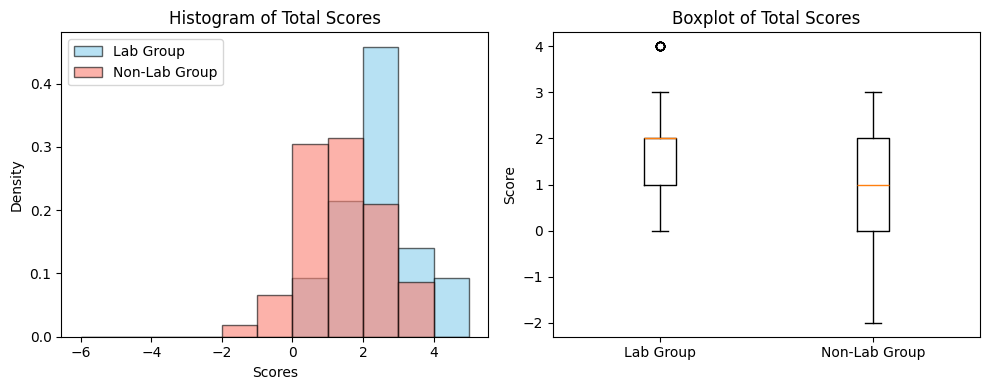

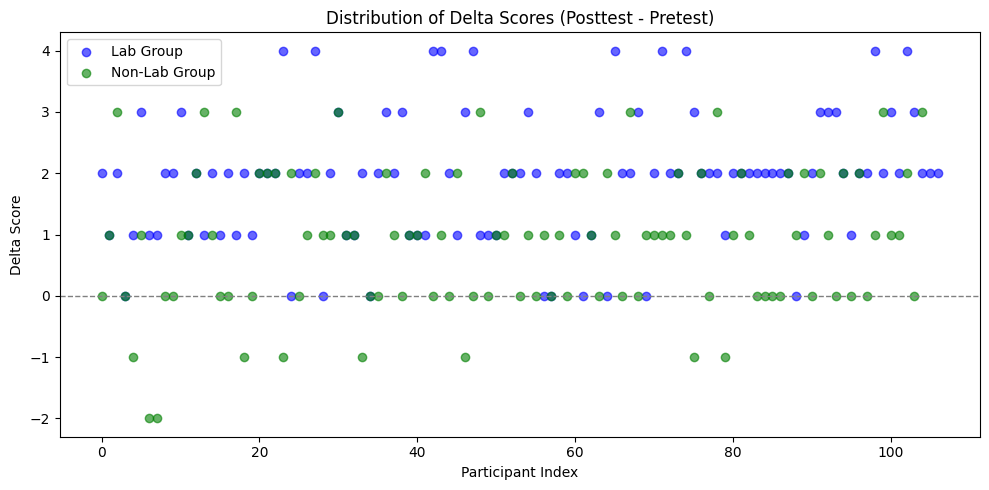

In [27]:
# === Main Analysis ===
print("=== Statistical Analysis Between Lab and Watrin Groups ===")

lab_deltas_values = [delta[1] for delta in lab_deltas]
non_lab_deltas_values = [delta[1] for delta in non_lab_deltas]

lab_deltas_array = pd.to_numeric(pd.Series(lab_deltas_values), errors='coerce').dropna().values
non_lab_deltas_array = pd.to_numeric(pd.Series(non_lab_deltas_values), errors='coerce').dropna().values

# Step 1: Descriptive statistics
# Summary statistics for both groups to understand general performance trends.
descriptive_stats(lab_deltas_array, "Lab Group")
descriptive_stats(non_lab_deltas_array, "Non-Lab Group")

# Step 2: Normality check using Shapiro-Wilk Test
# Tests whether scores in each group come from a normal distribution.
# Null hypothesis: the data is normally distributed. If p > 0.05, we fail to reject this.
p1 = shapiro_wilk_test(lab_deltas_array, "Lab Group")
if p1 > 0.05:
    print("Interpretation (Lab Group): Data appears to be normally distributed (p > 0.05).")
else:
    print("Interpretation (Lab Group): Data does not follow a normal distribution (p < 0.05).")

p2 = shapiro_wilk_test(non_lab_deltas_array, "Non-Lab Group")
if p2 > 0.05:
    print("Interpretation (Non-Lab Group): Data appears to be normally distributed (p > 0.05).")
else:
    print("Interpretation (Non-Lab Group): Data does not follow a normal distribution (p < 0.05).")

# Step 3: Test selection based on distributional assumptions
if p1 > 0.05 and p2 > 0.05:
    # If both distributions are normal, test if their variances are equal.
    # Levene’s test checks the null hypothesis that the variances are equal.
    p_var = levene_test(lab_deltas_array, non_lab_deltas_array)
    equal_var = p_var > 0.05

    if equal_var:
        print("\nInterpretation: Variances are approximately equal (p > 0.05). Proceeding with standard t-test.")
    else:
        print("\nInterpretation: Variances are unequal (p < 0.05). Proceeding with Welch’s t-test.")

    # Independent t-test: compares the means of two independent groups.
    # Null hypothesis: the means are equal. A significant p-value (< 0.05) suggests a difference in means.
    p_ttest = t_test(lab_deltas_array, non_lab_deltas_array, equal_var=equal_var)

    if p_ttest < 0.05:
        print("Interpretation: There is a statistically significant difference in mean scores between the groups.")
    else:
        print("Interpretation: No significant difference in mean scores between the groups.")
else:
    # If normality is violated, use Mann–Whitney U test instead of t-test.
    # This non-parametric test assesses whether one group tends to have higher values than the other.
    p_mwu = mann_whitney_u(lab_deltas_array, non_lab_deltas_array)

    if p_mwu < 0.05:
        print("Interpretation: Statistically significant difference in score distributions between groups.")
    else:
        print("Interpretation: No significant difference in score distributions between groups.")

# Step 4: Effect size using Cohen’s d
# This quantifies the magnitude of the difference between the two groups.
# Interpretation thresholds:
# - small effect: d ≈ 0.2
# - medium effect: d ≈ 0.5
# - large effect: d ≥ 0.8
d = cohens_d(lab_deltas_array, non_lab_deltas_array)

if abs(d) < 0.2:
    print("Interpretation: Negligible effect size.")
elif abs(d) < 0.5:
    print("Interpretation: Small effect size.")
elif abs(d) < 0.8:
    print("Interpretation: Medium effect size.")
else:
    print("Interpretation: Large effect size.")

# Step 5: Visualization
# Use visual plots to supplement the statistical results.
plot_distributions(lab_deltas_array, non_lab_deltas_array)

plt.figure(figsize=(10, 5))

    # Scatter plot
# Extract numerical delta values for plotting
lab_deltas_values = [delta[1] for delta in lab_deltas]
non_lab_deltas_values = [delta[1] for delta in non_lab_deltas]

# Scatter plot
plt.scatter(range(len(lab_deltas_values)), lab_deltas_values, color='blue', alpha=0.6, label='Lab Group')
plt.scatter(range(len(non_lab_deltas_values)), non_lab_deltas_values, color='green', alpha=0.6, label='Non-Lab Group')

# Visuals
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Distribution of Delta Scores (Posttest - Pretest)")
plt.xlabel("Participant Index")
plt.ylabel("Delta Score")
plt.legend()
plt.tight_layout()
plt.show()
